# **Burhanuddin Abizer Hariyanawala**
### Intern Id : *OIB/M1/IP7734*

## Task 5 : **Sales Prediction using Python**

### *Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.*

### *Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.*


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/Advertising.csv' , index_col=[0])
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Newspaper', ylabel='Density'>

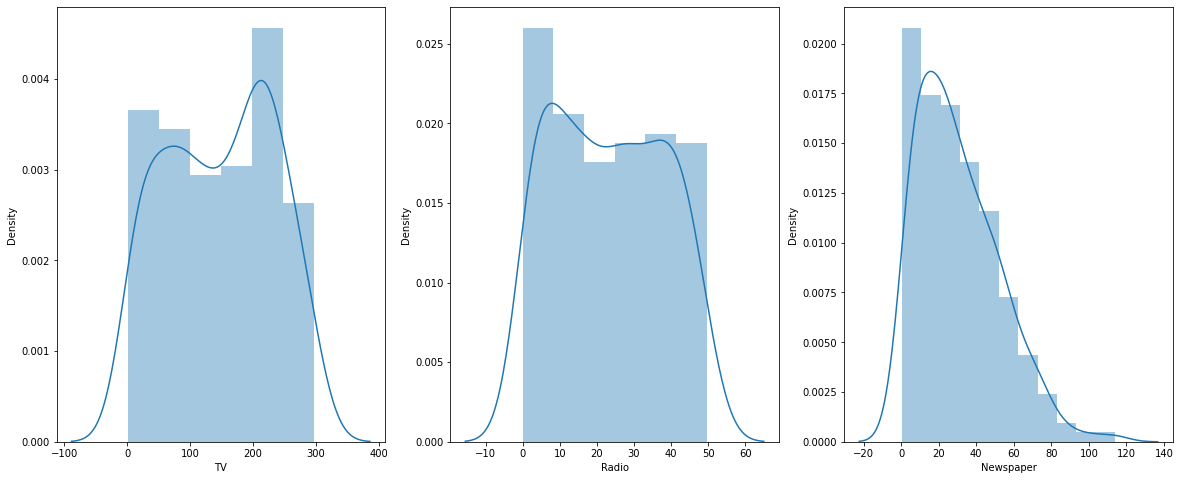

In [11]:
plt.subplots(figsize=(20,8))

plt.subplot(1,3,1)
sns.distplot(data.TV)

plt.subplot(1,3,2)
sns.distplot(data.Radio)

plt.subplot(1,3,3)
sns.distplot(data.Newspaper)

<Axes: xlabel='Newspaper'>

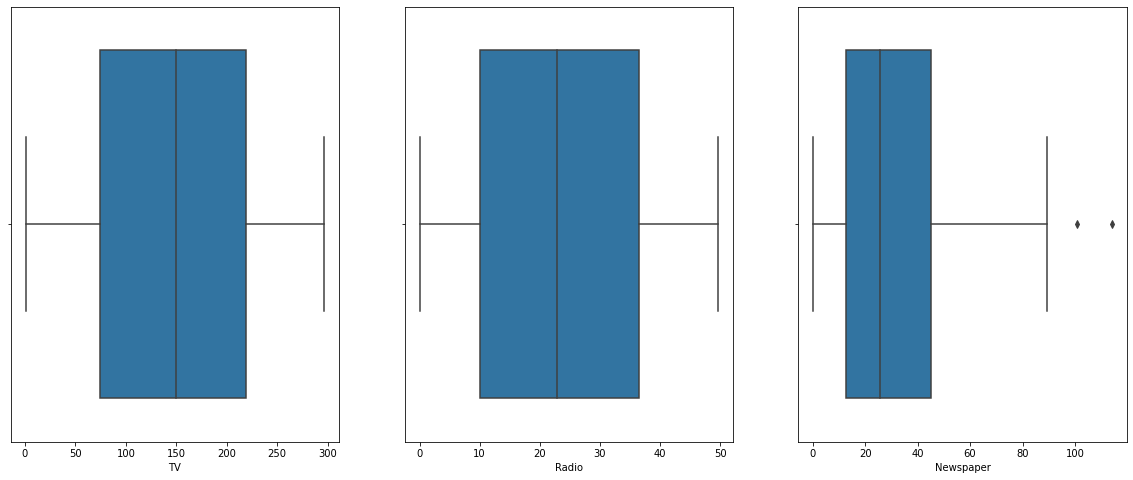

In [13]:
plt.subplots(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(x=data.TV)

plt.subplot(1,3,2)
sns.boxplot(x=data.Radio)

plt.subplot(1,3,3)
sns.boxplot(x=data.Newspaper)

<Axes: >

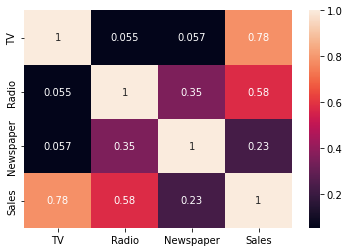

In [14]:
sns.heatmap(data.corr() , annot=True)

In [18]:
data.groupby(['TV','Radio','Newspaper']).Sales.mean().to_frame().reset_index()

,TV,Radio,Newspaper,Sales
0,0.7,39.6,8.7,1.6
1,4.1,11.6,5.7,3.2
2,5.4,29.9,9.4,5.3
3,7.3,28.1,41.4,5.5
4,7.8,38.9,50.6,6.6
...,...,...,...,...
195,289.7,42.3,51.2,25.4
196,290.7,4.1,8.5,12.8
197,292.9,28.3,43.2,21.4
198,293.6,27.7,1.8,20.7


In [20]:
data.groupby("Sales").mean()

,TV,Radio,Newspaper
Sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


Text(0.5, 1.0, 'TV vs Sales')

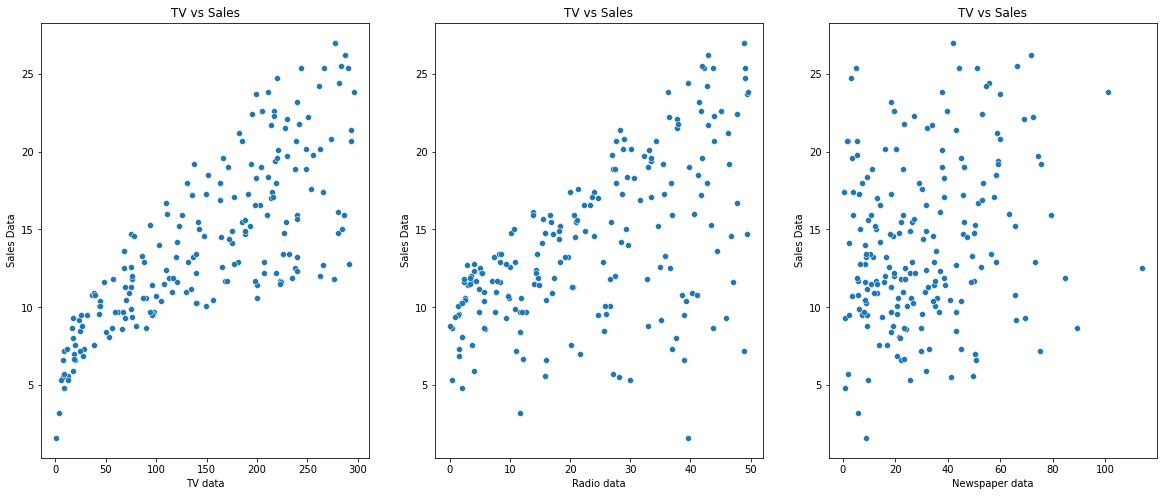

In [22]:
plt.subplots(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(x=data.TV , y=data.Sales)
plt.xlabel("TV data")
plt.ylabel("Sales Data")
plt.title("TV vs Sales")


plt.subplot(1,3,2)
sns.scatterplot(x=data.Radio , y=data.Sales)
plt.xlabel("Radio data")
plt.ylabel("Sales Data")
plt.title("TV vs Sales")

plt.subplot(1,3,3)
sns.scatterplot(x=data.Newspaper , y=data.Sales)
plt.xlabel("Newspaper data")
plt.ylabel("Sales Data")
plt.title("TV vs Sales")


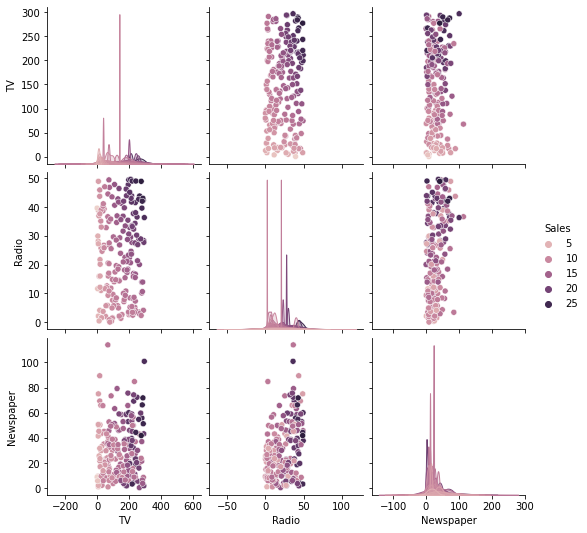

In [24]:
sns.pairplot(data , hue='Sales')
plt.show()

Text(0.5, 1.0, 'TV vs Sales')

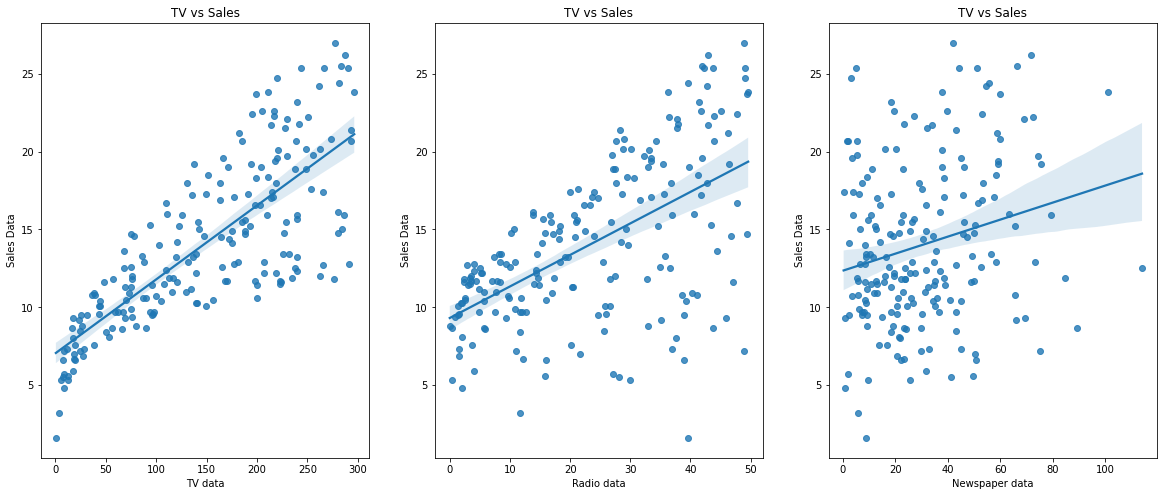

In [25]:
plt.subplots(figsize=(20,8))

plt.subplot(1,3,1)
sns.regplot(x=data.TV , y=data.Sales)
plt.xlabel("TV data")
plt.ylabel("Sales Data")
plt.title("TV vs Sales")


plt.subplot(1,3,2)
sns.regplot(x=data.Radio , y=data.Sales)
plt.xlabel("Radio data")
plt.ylabel("Sales Data")
plt.title("TV vs Sales")

plt.subplot(1,3,3)
sns.regplot(x=data.Newspaper , y=data.Sales)
plt.xlabel("Newspaper data")
plt.ylabel("Sales Data")
plt.title("TV vs Sales")


<Axes: xlabel='Newspaper', ylabel='Density'>

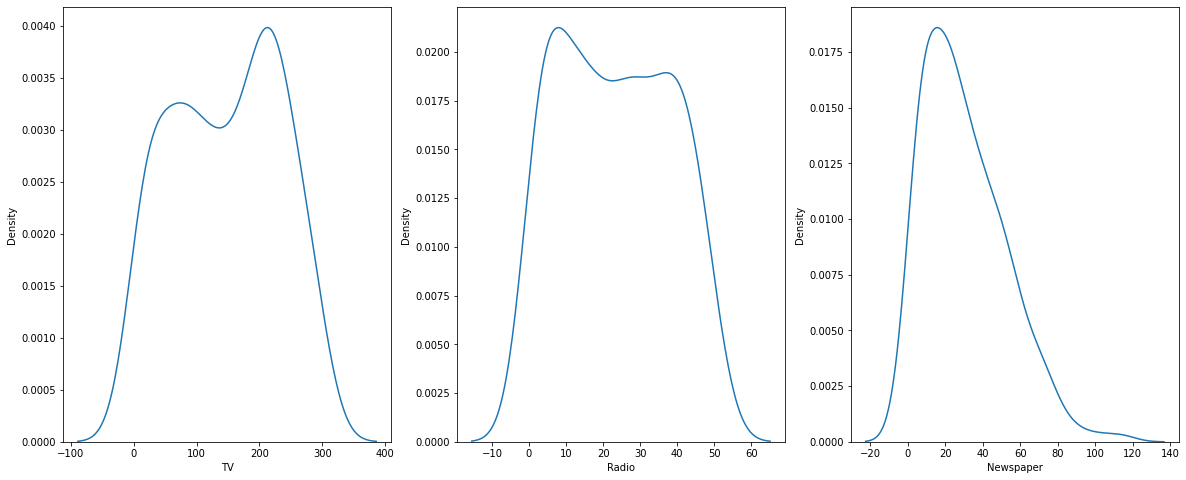

In [26]:
plt.subplots(figsize=(20,8))

plt.subplot(1,3,1)
sns.kdeplot(x=data.TV)

plt.subplot(1,3,2)
sns.kdeplot(x=data.Radio)

plt.subplot(1,3,3)
sns.kdeplot(x=data.Newspaper)

In [27]:
X = data.drop('Sales',axis=1)
y = data['Sales']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [32]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = reg.predict(X_test)


In [48]:
print('Intercept of the model:', round(reg.intercept_, 4))
print('Coefficient of the line:', round(reg.coef_[0], 4))

Intercept of the model: 2.7425
Coefficient of the line: 0.0457


In [46]:
print("R2 Score:    ",r2_score(y_test,y_pred))
print("MAE:    ", mean_absolute_error(y_test, y_pred))
print("MSE:    ",mean_squared_error(y_test, y_pred))
print("RMSE:   ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:     0.9176829231727409
MAE:     0.9993547687770488
MSE:     1.7567876755975451
RMSE:    1.3254386728919392
